In [1]:
import elastic
from elasticsearch import Elasticsearch
import datetime
import vibration
import datetime
import time

In [2]:
es = Elasticsearch(['192.168.20.32:9200'])
index = 'vibrations_testing'

In [3]:
def query_elastic():
    query_body = {"sort": {
        "datetime": {
            "order": "asc"
        }
    },
         "query": {
            "range": {
                "datetime": {
                    "gte": int(first_date),
                    "lt": int(last_date)
                }
            }
        }
    }
    number_hits = es.search(index=index,
                            doc_type='txt',
                            size=0,
                            body=query_body)['hits']['total']
    elastic_results = es.search(index=index,
                                doc_type='txt',
                                size=10000,
                                body=query_body)
    return elastic_results

In [4]:
def get_results(elastic_results, component):
    result_list = list()
    for i in results['hits']['hits']:
        result_list.append(i['_source'][component])
    return result_list

In [5]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot_rms(data_dict, figsize=(15,10), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.plot(data_dict['x'], data_dict['data'], label='rms')
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel('Amplitude (mm/s)')
    plt.axis()
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

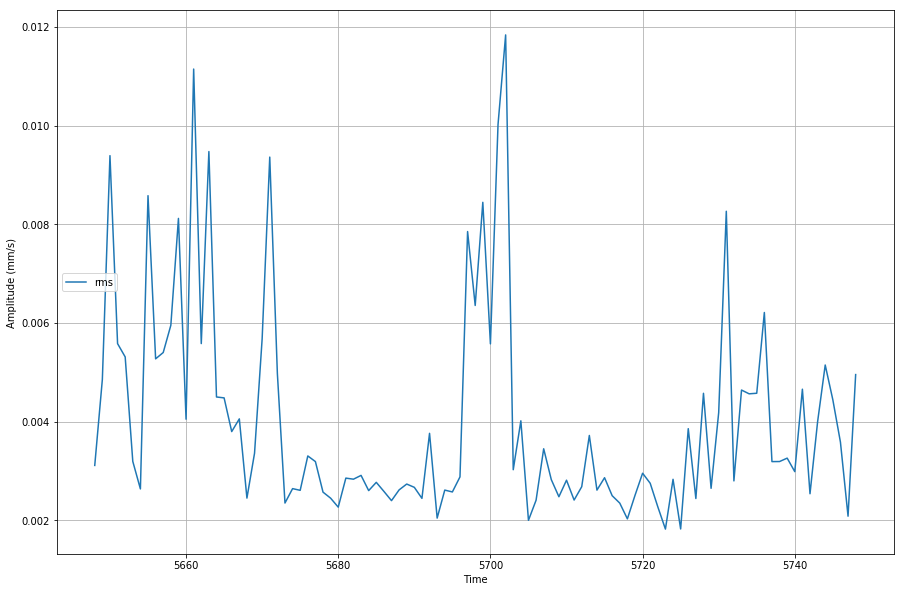

In [ ]:
plot_list = list()
x_axis_list = list()
plot_data = dict()

while True:
    start = time.time()
    now = datetime.datetime.now() - datetime.timedelta(seconds=2)
    before = now - datetime.timedelta(seconds=1)
    last_date = datetime.datetime.strftime(now, '%y%m%d%H%M%S')
    first_date = datetime.datetime.strftime(before, '%y%m%d%H%M%S')
    results = query_elastic()
    result_list = get_results(results, 'X')
    
    if len(plot_list) <= 100:
        if len(result_list)!=0:
            plot_list += result_list
            if len(x_axis_list) == 0:
                x_axis_list += [1]
            else:
                x_axis_list += [x_axis_list[-1]+1]
    else:
        if len(result_list)!=0:
            plot_list = plot_list[1:] + result_list
            x_axis_list = x_axis_list[1:] + [x_axis_list[-1]+1]
    plot_data['data'] = plot_list
    plot_data['x'] = x_axis_list
    live_plot_rms(plot_data)
    time.sleep(1-(time.time()-start))